In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import h5py


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

['angles', 'energies', 'event_data', 'event_ids', 'labels', 'nhits', 'positions', 'root_files']


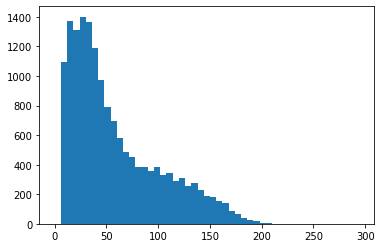

In [30]:
h5_filepath = "/fast_scratch/NeutronGNN/iwcd_mpmt_shorttank_neutrongnn_trainval_10files.h5"

with h5py.File(h5_filepath, 'r') as file:
    print(list(file.keys()))
    h5_event_data = file['event_data']
    h5_nhits = file['nhits']
    h5_labels = file['labels']
    event_mem_data = np.memmap(h5_filepath, mode='r', shape=h5_event_data.shape,
                               offset=h5_event_data.id.get_offset(),
                               dtype=h5_event_data.dtype)
    non_zero = [np.count_nonzero(event_mem_data[i,:,0]) for i in range(0, event_mem_data.shape[0])]
    non_zero  = np.array(non_zero)
    q_sum = [np.sum(event_mem_data[i,:,0]) for i in range(0, event_mem_data.shape[0])]
    q_sum  = np.array(q_sum)
    nhits = np.array(h5_nhits)
    labels = np.array(h5_labels)
    plt.hist(non_zero, bins=np.arange(0, 300, 6))

(array([0.000e+00, 1.098e+03, 1.375e+03, 1.313e+03, 1.401e+03, 1.367e+03,
        1.189e+03, 9.700e+02, 7.900e+02, 6.950e+02, 5.800e+02, 4.840e+02,
        4.550e+02, 3.850e+02, 3.850e+02, 3.590e+02, 3.820e+02, 3.270e+02,
        3.450e+02, 2.880e+02, 3.100e+02, 2.560e+02, 2.740e+02, 2.270e+02,
        1.910e+02, 1.840e+02, 1.570e+02, 1.410e+02, 8.500e+01, 6.700e+01,
        4.000e+01, 2.800e+01, 1.900e+01, 8.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
         78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
        156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
        234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294]),
 <a list of 49 Patch objects>)

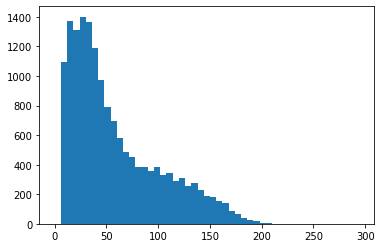

In [31]:
plt.hist(nhits, bins=np.arange(0, 300, 6))

(array([1.970e+02, 1.465e+03, 1.517e+03, 1.509e+03, 1.567e+03, 1.245e+03,
        9.680e+02, 8.460e+02, 7.250e+02, 5.490e+02, 5.160e+02, 3.910e+02,
        4.220e+02, 4.110e+02, 3.790e+02, 3.940e+02, 3.510e+02, 3.680e+02,
        3.100e+02, 3.320e+02, 2.780e+02, 3.040e+02, 2.810e+02, 2.430e+02,
        1.660e+02, 1.240e+02, 1.130e+02, 7.100e+01, 3.900e+01, 2.400e+01,
        1.600e+01, 1.200e+01, 1.000e+01, 5.000e+00, 4.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00]),
 array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
        104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
        208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304,
        312, 320, 328, 336, 344, 352, 360, 368, 376, 384, 392]),
 <a list of 49 Patch objects>)

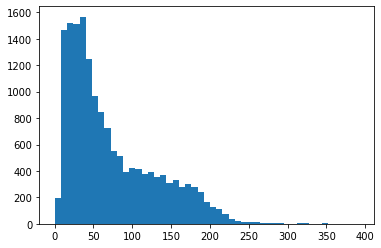

In [32]:
plt.hist(q_sum, bins=np.arange(0, 400, 8))

[1 1 1 ... 0 0 0]


(array([8311.,    0., 7869.]),
 array([0. , 0.5, 1. , 1.5]),
 <a list of 3 Patch objects>)

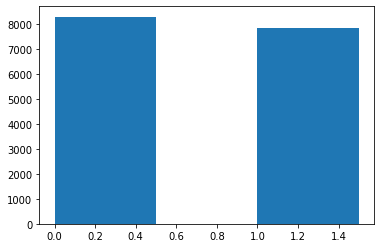

In [33]:
print(labels)
plt.hist(labels, bins=np.arange(0, 2, 0.5))

In [34]:
# Read the data
data = pd.DataFrame({'labels': labels, 'nhits': nhits, 'q_sum': q_sum})

# Select subset of predictors
cols_to_use = ['nhits', 'q_sum']
X = data[cols_to_use]

# Select target
y = data.labels

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [35]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [36]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 0.17624210061779422


In [37]:
print(predictions)

[2.3038352e-01 5.6139654e-01 4.5654178e-04 ... 4.5654178e-04 9.9933970e-01
 2.9928529e-01]


In [38]:
print(type(predictions))

<class 'numpy.ndarray'>


In [39]:
accuracy = np.count_nonzero(np.absolute(predictions - y_valid) < 0.5)
print(predictions.size)

4045


In [40]:
print("Accuracy: " + str(accuracy / predictions.size))

Accuracy: 0.8682323856613102
